In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

In [2]:
train_path = '../input/data-storm-30/train_data.csv'
train_dataset = pd.read_csv(train_path)
train_dataset = train_dataset.drop_duplicates(keep = 'first')

cat_1_train_dataset = train_dataset.loc[train_dataset['CategoryCode'] == 'category_1']
cat_2_train_dataset = train_dataset.loc[train_dataset['CategoryCode'] == 'category_2']
cat_3_train_dataset = train_dataset.loc[train_dataset['CategoryCode'] == 'category_3']
cat_4_train_dataset = train_dataset.loc[train_dataset['CategoryCode'] == 'category_4']

In [ ]:
cat_1_train_dataset.head()

In [ ]:
print(cat_1_train_dataset.dtypes)
cat_1_train_dataset["DateID"] = pd.to_datetime(cat_1_train_dataset["DateID"])
print(cat_1_train_dataset.dtypes)

In [ ]:
cat_1_train_dataset.head()

In [ ]:
cat_1_train_dataset.sort_values(by='DateID', inplace=True)

In [ ]:
cat_1_train_dataset.head()

In [ ]:
cat_1_train_dataset["DateID"]
cat_1_train_dataset['DateID'].iat[0]

In [3]:
Item_3148_train_dataset = cat_1_train_dataset.loc[cat_1_train_dataset['ItemCode'] == 3418]
print(Item_3148_train_dataset)

      CategoryCode  ItemCode      DateID  DailySales
308     category_1      3418    1/4/2022          26
380     category_1      3418    1/5/2022           2
444     category_1      3418    1/6/2022          20
473     category_1      3418   12/9/2021          16
569     category_1      3418   12/7/2021          11
...            ...       ...         ...         ...
18565   category_1      3418  10/24/2021           2
18616   category_1      3418  10/16/2021           2
19019   category_1      3418   10/7/2021           8
19527   category_1      3418  11/22/2021           2
19830   category_1      3418  10/12/2021           9

[129 rows x 4 columns]


In [5]:
Item_3148_train_dataset.sort_values(by='DateID', inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [6]:
Item_3148_train_dataset_forTraining = Item_3148_train_dataset[['ItemCode','DateID', 'DailySales']]
Item_3148_train_dataset_forTraining.head()

,ItemCode,DateID,DailySales
10815,3418,1/1/2022,4
13878,3418,1/10/2022,7
6625,3418,1/11/2022,7
12374,3418,1/12/2022,14
6378,3418,1/13/2022,28


In [7]:
Item_3148_series = Item_3148_train_dataset_forTraining["DailySales"].squeeze()
Item_3148_series.describe()

count    129.000000
mean       9.829457
std        6.414247
min        1.000000
25%        5.000000
50%        9.000000
75%       13.000000
max       29.000000
Name: DailySales, dtype: float64

<AxesSubplot:xlabel='DateID'>

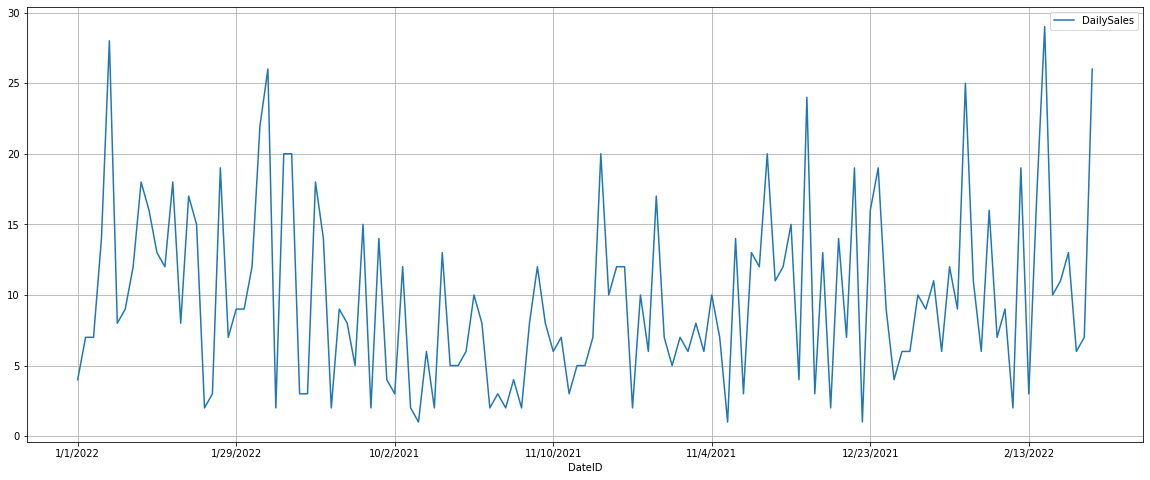

In [8]:
Item_3148_train_dataset_forTraining.plot(x='DateID',y='DailySales', grid = True, figsize = (20,8))

In [ ]:
print(Item_3148_series)
print(Item_3148_train_dataset_forTraining.columns)

In [9]:
Item_3148_numpy = Item_3148_train_dataset_forTraining.to_numpy()

In [10]:
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

#swap points and rebounds columns
df = swap_columns(Item_3148_train_dataset_forTraining, 'DateID', 'DailySales')

#view updated DataFrame
print(df)

       ItemCode  DailySales     DateID
10815      3418           4   1/1/2022
13878      3418           7  1/10/2022
6625       3418           7  1/11/2022
12374      3418          14  1/12/2022
6378       3418          28  1/13/2022
...         ...         ...        ...
11141      3418          11   2/5/2022
10424      3418          13   2/6/2022
15024      3418           6   2/7/2022
1146       3418           7   2/8/2022
1294       3418          26   2/9/2022

[129 rows x 3 columns]


In [11]:
Item_3148_numpy = df.to_numpy()
print(Item_3148_numpy[:,0:2])

[[3418 4]
 [3418 7]
 [3418 7]
 [3418 14]
 [3418 28]
 [3418 8]
 [3418 9]
 [3418 12]
 [3418 18]
 [3418 16]
 [3418 13]
 [3418 12]
 [3418 18]
 [3418 8]
 [3418 17]
 [3418 15]
 [3418 2]
 [3418 3]
 [3418 19]
 [3418 7]
 [3418 9]
 [3418 9]
 [3418 12]
 [3418 22]
 [3418 26]
 [3418 2]
 [3418 20]
 [3418 20]
 [3418 3]
 [3418 3]
 [3418 18]
 [3418 14]
 [3418 2]
 [3418 9]
 [3418 8]
 [3418 5]
 [3418 15]
 [3418 2]
 [3418 14]
 [3418 4]
 [3418 3]
 [3418 12]
 [3418 2]
 [3418 1]
 [3418 6]
 [3418 2]
 [3418 13]
 [3418 5]
 [3418 5]
 [3418 6]
 [3418 10]
 [3418 8]
 [3418 2]
 [3418 3]
 [3418 2]
 [3418 4]
 [3418 2]
 [3418 8]
 [3418 12]
 [3418 8]
 [3418 6]
 [3418 7]
 [3418 3]
 [3418 5]
 [3418 5]
 [3418 7]
 [3418 20]
 [3418 10]
 [3418 12]
 [3418 12]
 [3418 2]
 [3418 10]
 [3418 6]
 [3418 17]
 [3418 7]
 [3418 5]
 [3418 7]
 [3418 6]
 [3418 8]
 [3418 6]
 [3418 10]
 [3418 7]
 [3418 1]
 [3418 14]
 [3418 3]
 [3418 13]
 [3418 12]
 [3418 20]
 [3418 11]
 [3418 12]
 [3418 15]
 [3418 4]
 [3418 24]
 [3418 3]
 [3418 13]
 [3418 2]


In [ ]:
import torch
a = torch.zeros(2)
b = torch.ones(2)
print(a == b)
#tensor([False, False])
print(a == 0)
#tensor([True, True])
if a == b:
    print (a)

In [ ]:
c = (a < b)
print(c)

In [17]:
import torch
import torch.nn as nn
import numpy as np
import time
import math
from matplotlib import pyplot

torch.manual_seed(0)
np.random.seed(0)

# S is the source sequence length
# T is the target sequence length
# N is the batch size
# E is the feature number

#src = torch.rand((10, 32, 512)) # (S,N,E) 
#tgt = torch.rand((20, 32, 512)) # (T,N,E)
#out = transformer_model(src, tgt)

input_window = 7 # number of input steps
output_window = 1 # number of prediction steps, in this model its fixed to one
batch_size = 7 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class PositionalEncoding(nn.Module):

    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()       
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        #pe.requires_grad = False
        self.register_buffer('pe', pe)

    def forward(self, x):
        return x + self.pe[:x.size(0), :]
          

class TransAm(nn.Module):
    def __init__(self,feature_size=250,num_layers=1,dropout=0.1):
        super(TransAm, self).__init__()
        self.model_type = 'Transformer'
        
        self.src_mask = None
        self.pos_encoder = PositionalEncoding(feature_size)
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=feature_size, nhead=10, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=num_layers)        
        self.decoder = nn.Linear(feature_size,1)
        self.init_weights()

    def init_weights(self):
        initrange = 0.1    
        self.decoder.bias.data.zero_()
        self.decoder.weight.data.uniform_(-initrange, initrange)

    def forward(self,src):
        if self.src_mask is None or self.src_mask.size(0) != len(src):
            device = src.device
            mask = self._generate_square_subsequent_mask(len(src)).to(device)
            self.src_mask = mask

        src = self.pos_encoder(src)
        output = self.transformer_encoder(src,self.src_mask)#, self.src_mask)
        output = self.decoder(output)
        return output

    def _generate_square_subsequent_mask(self, sz):
        mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
        mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return mask



# if window is 100 and prediction step is 1
# in -> [0..99]
# target -> [1..100]
def create_inout_sequences(input_data, tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+output_window:i+tw+output_window]
        inout_seq.append((train_seq ,train_label))
    return torch.FloatTensor(inout_seq)

def get_data(dataset, length):
    # construct a littel toy dataset
    time        = np.arange(0, length, 1)    
    #amplitude   = np.sin(time) + np.sin(time*0.05) +np.sin(time*0.12) *np.random.normal(-0.2, 0.2, len(time))
    amplitude = dataset

    
    from sklearn.preprocessing import MinMaxScaler
    
    #loading weather data from a file
    #from pandas import read_csv
    #series = read_csv('daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
    #series = cat_1_timeseries
    
    # looks like normalizing input values curtial for the model
    scaler = MinMaxScaler(feature_range=(-1, 1)) 
    #amplitude = scaler.fit_transform(series.to_numpy().reshape(-1, 1)).reshape(-1)
    amplitude = scaler.fit_transform(amplitude.reshape(-1, 1)).reshape(-1)
    #print(amplitude.shape)
    #amplitude = series
    
    
    sampels = length - 15
    train_data = amplitude[:sampels]
    test_data = amplitude[sampels:]
    #print(train_data)

    # convert our train data into a pytorch train tensor
    #train_tensor = torch.FloatTensor(train_data).view(-1)
    # todo: add comment.. 
    train_sequence = create_inout_sequences(train_data,input_window)
    train_sequence = train_sequence[:-output_window] #todo: fix hack? -> din't think this through, looks like the last n sequences are to short, so I just remove them. Hackety Hack.. 

    #test_data = torch.FloatTensor(test_data).view(-1) 
    test_data = create_inout_sequences(test_data,input_window)
    test_data = test_data[:-output_window] #todo: fix hack?

    return train_sequence.to(device),test_data.to(device)

def get_batch(source, i,batch_size):
    seq_len = min(batch_size, len(source) - 1 - i)
    data = source[i:i+seq_len]    
    input = torch.stack(torch.stack([item[0] for item in data]).chunk(input_window,1)) # 1 is feature size
    target = torch.stack(torch.stack([item[1] for item in data]).chunk(input_window,1))
    return input, target


def train(train_data):
    model.train() # Turn on the train mode \o/
    total_loss = 0.
    under_loss = 0.
    over_loss = 0.
    start_time = time.time()

    for batch, i in enumerate(range(0, len(train_data) - 1, batch_size)):
        data, targets = get_batch(train_data, i,batch_size)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, targets)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.7)
        optimizer.step()

        total_loss += loss.item()
        log_interval = int(len(train_data) / batch_size / 5)
        if batch % log_interval == 0 and batch > 0:
            cur_loss = total_loss / log_interval
            elapsed = time.time() - start_time
            print('| epoch {:3d} | {:5d}/{:5d} batches | '
                  'lr {:02.6f} | {:5.2f} ms | '
                  'loss {:5.5f} | ppl {:8.2f}'.format(
                    epoch, batch, len(train_data) // batch_size, scheduler.get_lr()[0],
                    elapsed * 1000 / log_interval,
                    cur_loss, math.exp(cur_loss)))
            total_loss = 0
            start_time = time.time()

def plot_and_loss(eval_model, data_source,epoch):
    eval_model.eval() 
    total_loss = 0.
    under_loss = 0.
    over_loss = 0.
    test_result = torch.Tensor(0)    
    truth = torch.Tensor(0)
    print(len(data_source))
    with torch.no_grad():
        for i in range(0, len(data_source) - 1):
            data, target = get_batch(data_source, i,1)
            output = eval_model(data)            
            total_loss += criterion(output, target).item()
            test_result = torch.cat((test_result, output[-1].view(-1).cpu()), 0)
            truth = torch.cat((truth, target[-1].view(-1).cpu()), 0)
            
    #test_result = test_result.cpu().numpy() -> no need to detach stuff.. 
    len(test_result)

    pyplot.plot(test_result,color="red")
    pyplot.plot(truth[:70],color="blue")
    pyplot.plot(test_result-truth,color="green")
    pyplot.grid(True, which='both')
    pyplot.axhline(y=0, color='k')
    pyplot.savefig('./transformer-epoch%d.png'%epoch)
    pyplot.close()
    
    return total_loss / i


# predict the next n steps based on the input data 
def predict_future(eval_model, data_source,steps):
    eval_model.eval() 
    total_loss = 0.
    under_loss = 0.
    over_loss = 0.
    test_result = torch.Tensor(0)    
    truth = torch.Tensor(0)
    data, _ = get_batch(data_source, 0,1)
    with torch.no_grad():
        for i in range(0, steps):            
            output = eval_model(data[-input_window:])                        
            data = torch.cat((data, output[-1:]))
            
    data = data.cpu().view(-1)
    
    # I used this plot to visualize if the model pics up any long therm struccture within the data. 
    pyplot.plot(data,color="red")       
    pyplot.plot(data[:input_window],color="blue")    
    pyplot.grid(True, which='both')
    pyplot.axhline(y=0, color='k')
    pyplot.savefig('./transformer-future%d.png'%steps)
    pyplot.close()

""""def under_loss(data, output, targets):
    under_loss += len(data[0])* criterion(output, targets).cpu().item()
    return under_loss

def over_loss(data, output, targets):
    over_loss += len(data[0])* criterion(output, targets).cpu().item()
    return over_loss"""

def evaluate(eval_model, data_source):
    from tensorflow.python.ops import control_flow_ops
    eval_model.eval() # Turn on the evaluation mode
    total_loss = 0.
    under_loss = 0.
    over_loss = 0.
    
    under_output_list = []
    under_target_list = []
    over_output_list = []
    over_target_list = []
    
    total_loss_list = 0.
    eval_batch_size = 7
    #print(len(data_source))
    with torch.no_grad():
        for i in range(0, len(data_source) - 1, eval_batch_size):
            data, targets = get_batch(data_source, i,eval_batch_size)
            output = eval_model(data)
            
            #under_loss_result = (output <= targets)
            #under_result = tf.cond(under_loss_result, under_loss, over_loss).any()
            #sess = tf.Session()
            #sess.run(under_result, feed_dict={under_loss_result: True})   
            #sess.run(under_result, feed_dict={under_loss_result: False})  
            #total_loss = 0.7*under_loss + 0.3*over_loss
            #print("output",output)
            #print("target",targets)
            under_tensor = torch.gt(targets,output)
            """"for i, x in enumerate(under_tensor.numpy()):
                if(i < 6 and x[i]==True):
                    print(output[i-1:i,i-1:i,:])
                    print(x[i])"""
            output_flatten = torch.flatten(output).tolist()
            targets_flatten = torch.flatten(targets).tolist()
            #print(output_flatten)
            #print(targets_flatten)
            for i in range(len(output_flatten)):
                if(output_flatten[i]< targets_flatten[i]):
                    under_output_list.append(output_flatten[i])
                    under_target_list.append(targets_flatten[i])
                else:
                    over_output_list.append(output_flatten[i])
                    over_target_list.append(targets_flatten[i])
            #total_loss_list = under_loss + over_loss
            #total_loss_list = total_loss_list / len(data[0])
            #print(total_loss_list)
            under_output_tensor = torch.FloatTensor(under_output_list)
            under_target_tensor= torch.FloatTensor(under_target_list)
            over_output_tensor = torch.FloatTensor(over_output_list)
            over_target_tensor = torch.FloatTensor(over_target_list)
            
            #print(len(under_output_list))
            #print(len(over_output_list))
            under_loss = criterion(under_output_tensor, under_target_tensor).cpu().item()
            over_loss = criterion(over_output_tensor, over_target_tensor).cpu().item()
            #print(under_loss)
            #print(over_loss)
            if(len(under_output_list) != 0 and len(over_output_list) != 0):
                total_loss_list += (0.7*under_loss + 0.3*over_loss)
            elif(len(under_output_list) == 0):
                total_loss_list += 0.9*over_loss
            elif(len(over_output_list) == 0):
                total_loss_list += 1.1*under_loss
            #print(total_loss_list)
            total_loss_list = len(data[0])* total_loss_list
            total_loss += len(data[0])* criterion(output, targets).cpu().item()
            #under_loss += len(data[0])* criterion(output_flatten, targets_flatten).cpu().item()
            #print(total_loss)
            #print(under_loss)
    print(total_loss)
    print(total_loss_list)
    return total_loss_list / len(data_source)

def predict_future_testing(eval_model, data_source,steps):
    eval_model.eval() 
    total_loss = 0.
    under_loss = 0.
    over_loss = 0.
    test_result = torch.Tensor(0)    
    truth = torch.Tensor(0)
    data, _ = get_batch(data_source, 0,1)
    with torch.no_grad():
        for i in range(0, steps):            
            output = eval_model(data[-input_window:])                        
            data = torch.cat((data, output[-1:]))
            
    data = data.cpu().view(-1)
    
    print(data)
    # I used this plot to visualize if the model pics up any long therm struccture within the data. 
    pyplot.plot(data,color="red")       
    pyplot.plot(data[:input_window],color="blue")    
    pyplot.grid(True, which='both')
    pyplot.axhline(y=0, color='k')
    pyplot.savefig('./transformer-future%d.png'%steps)
    pyplot.close()
    
    return data


#src = torch.rand(input_window, batch_size, 1) # (source sequence length,batch size,feature number) 
#out = model(src)
#
#print(out)
#print(out.shape)

In [18]:
length = len(Item_3148_train_dataset_forTraining)
train_data, val_data = get_data(Item_3148_numpy[:,1], length)

#print(val_data)
model = TransAm().to(device)

criterion = nn.L1Loss()
lr = 0.01 
#optimizer = torch.optim.SGD(model.parameters(), lr=lr)
optimizer = torch.optim.AdamW(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.95)

best_val_loss = float("inf")
epochs = 5 # The number of epochs
best_model = None

for epoch in range(1, epochs + 1):
    epoch_start_time = time.time()
    train(train_data)

    if(epoch % 10 is 0):
        val_loss = plot_and_loss(model, val_data,epoch)
        predict_future(model, val_data,28)
    else:
        val_loss = evaluate(model, val_data)

    print('-' * 89)
    print('| end of epoch {:3d} | time: {:5.2f}s | valid loss {:5.5f} | valid ppl {:8.2f}'.format(epoch, (time.time() - epoch_start_time),
                                     val_loss, val_loss))
    print('-' * 89)

    #if val_loss < best_val_loss:
    #    best_val_loss = val_loss
    #    best_model = model

    scheduler.step() 


""""scaler = MinMaxScaler(feature_range=(-1, 1)) 
amplitude = Item_3148_numpy[:,1]
amplitude = scaler.fit_transform(amplitude.reshape(-1, 1)).reshape(-1)
test_data = create_inout_sequences(amplitude,7)
test_data = test_data[:-1]
data = predict_future_testing(model,test_data,28)
px = pd.DataFrame(data.numpy())
results = scaler.inverse_transform(px)
key1 = np.sum(results[0:7])
key2 = np.sum(results[7:14])
key3 = np.sum(results[14:21])
key4 = np.sum(results[21:28])
numpy_keys = [item, key1,key2,key3,key4, val_loss]
dict_test[index] = numpy_keys"""

[ 1.         -0.99824407  1.         -0.99648815  1.         -0.99648815
  1.         -0.99239099  1.         -0.98419666  1.         -0.99590284
  1.         -0.99531753  1.         -0.9935616   1.         -0.99004975
  1.         -0.99122037  1.         -0.99297629  1.         -0.9935616
  1.         -0.99004975  1.         -0.99590284  1.         -0.99063506
  1.         -0.99180568  1.         -0.99941469  1.         -0.99882938
  1.         -0.98946444  1.         -0.99648815  1.         -0.99531753
  1.         -0.99531753  1.         -0.9935616   1.         -0.98770852
  1.         -0.98536728  1.         -0.99941469  1.         -0.98887913
  1.         -0.98887913  1.         -0.99882938  1.         -0.99882938
  1.         -0.99004975  1.         -0.99239099  1.         -0.99941469
  1.         -0.99531753  1.         -0.99590284  1.         -0.99765876
  1.         -0.99180568  1.         -0.99941469  1.         -0.99239099
  1.         -0.99824407  1.         -0.99882938  1.

/opt/conda/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:370: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)


| epoch   1 |    12/   15 batches | lr 0.010000 | 16.19 ms | loss 0.77988 | ppl     2.18
124.24315518140793
2.3137378283993736e+16
-----------------------------------------------------------------------------------------
| end of epoch   1 | time:  0.29s | valid loss 170127781499953.93750 | valid ppl 170127781499953.94
-----------------------------------------------------------------------------------------
| epoch   2 |     3/   15 batches | lr 0.009025 | 23.84 ms | loss 0.99701 | ppl     2.71
| epoch   2 |     6/   15 batches | lr 0.009025 | 20.41 ms | loss 0.74466 | ppl     2.11
| epoch   2 |     9/   15 batches | lr 0.009025 | 17.19 ms | loss 0.66684 | ppl     1.95
| epoch   2 |    12/   15 batches | lr 0.009025 | 16.64 ms | loss 0.50014 | ppl     1.65
47.372602343559265
1.8858780028758476e+16
-----------------------------------------------------------------------------------------
| end of epoch   2 | time:  0.32s | valid loss 138667500211459.37500 | valid ppl 138667500211459.38
-

'"scaler = MinMaxScaler(feature_range=(-1, 1)) \namplitude = Item_3148_numpy[:,1]\namplitude = scaler.fit_transform(amplitude.reshape(-1, 1)).reshape(-1)\ntest_data = create_inout_sequences(amplitude,7)\ntest_data = test_data[:-1]\ndata = predict_future_testing(model,test_data,28)\npx = pd.DataFrame(data.numpy())\nresults = scaler.inverse_transform(px)\nkey1 = np.sum(results[0:7])\nkey2 = np.sum(results[7:14])\nkey3 = np.sum(results[14:21])\nkey4 = np.sum(results[21:28])\nnumpy_keys = [item, key1,key2,key3,key4, val_loss]\ndict_test[index] = numpy_keys'

**Round 1 training****

In [ ]:
from collections import Counter
dict_results = {}

list_test = [9925,16936, 23200, 32245, 35449, 35530, 36898, 37510 , 37861, 38518, 39436,41830, 42424,42496, 43630, 43738, 57058, 65788, 86992, 87046, 87559, 88450, 111382,111436,117610,119554,123307,130993,132334,145330,145978,169504,174436,213802,216151,225259,262384,267478,370195, 371104,687616,731104,753613,815101,837943,838456,839374,858886,872260,893824,903976,906595,999403,1003183,1003192,1006090,1006099,1021264,1024810,1032532,1032559,1032568,1044610,1044691,1047967,1049776,1054978,1056463,1060630,1061341,1063600,1067074,1067119,1067128,1068883,1070818,1071115,1075651,1076929,1077118,1081060,1081069,1081078,1081321,1081339,1082743,1085749,1090024,1090258,1092184,1101553,1101562,1101571,1101769,1103056,1105018,1105027]

print(Counter(list_test))

list_new = [9925,16936]


In [ ]:
dict_test = {}
from sklearn.preprocessing import MinMaxScaler
for item in list_new:
    print(item)
    index = list_test.index(item)
    Item_3148_train_dataset = train_dataset.loc[train_dataset['ItemCode'] == item]
    Item_3148_train_dataset.sort_values(by='DateID', inplace=True)
    Item_3148_train_dataset_forTraining = Item_3148_train_dataset[['DateID', 'DailySales']]
    Item_3148_train_dataset_forTraining.head()
    Item_3148_numpy = Item_3148_train_dataset_forTraining.to_numpy()
    length = len(Item_3148_train_dataset_forTraining)
    Item_3148_train_dataset_forTraining.index = range(length)
    Item_3148_series = Item_3148_train_dataset_forTraining["DailySales"].squeeze()
    print("")
    
    #print(Item_3148_numpy[:,1])
    train_data, val_data = get_data(Item_3148_numpy[:,1], length)

    #print(val_data)
    model = TransAm().to(device)

    criterion = nn.L1Loss()
    lr = 0.01 
    #optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.95)

    best_val_loss = float("inf")
    epochs = 5 # The number of epochs
    best_model = None

    for epoch in range(1, epochs + 1):
        epoch_start_time = time.time()
        train(train_data)

        if(epoch % 10 is 0):
            val_loss = plot_and_loss(model, val_data,epoch)
            predict_future(model, val_data,28)
        else:
            val_loss = evaluate(model, val_data)

        print('-' * 89)
        print('| end of epoch {:3d} | time: {:5.2f}s | valid loss {:5.5f} | valid ppl {:8.2f}'.format(epoch, (time.time() - epoch_start_time),
                                         val_loss, math.exp(val_loss)))
        print('-' * 89)

        #if val_loss < best_val_loss:
        #    best_val_loss = val_loss
        #    best_model = model

        scheduler.step() 
        
    
    scaler = MinMaxScaler(feature_range=(-1, 1)) 
    amplitude = Item_3148_numpy[:,1]
    amplitude = scaler.fit_transform(amplitude.reshape(-1, 1)).reshape(-1)
    test_data = create_inout_sequences(amplitude,7)
    test_data = test_data[:-1]
    data = predict_future_testing(model,test_data,28)
    px = pd.DataFrame(data.numpy())
    results = scaler.inverse_transform(px)
    key1 = np.sum(results[0:7])
    key2 = np.sum(results[7:14])
    key3 = np.sum(results[14:21])
    key4 = np.sum(results[21:28])
    numpy_keys = [item, key1,key2,key3,key4, val_loss]
    dict_test[index] = numpy_keys
        
        


In [ ]:
print(dict_test)

In [ ]:
#dict = {"Test Results": char_name}

df = pd.DataFrame(dict_test)

df.to_csv('./Transformer.csv')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1)) 
amplitude = Item_3148_numpy[:,1]
amplitude = scaler.fit_transform(amplitude.reshape(-1, 1)).reshape(-1)
test_data = create_inout_sequences(amplitude,7)
test_data = test_data[:-1]
data = predict_future_testing(model,test_data,30)

In [ ]:
print(type(data))

In [ ]:
px = pd.DataFrame(data.numpy())

In [ ]:
scaler.inverse_transform(px)

Dont consider these: With other parallel models

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import time
import math
from matplotlib import pyplot

torch.manual_seed(0)
np.random.seed(0)

# This concept is also called teacher forceing. 
# The flag decides if the loss will be calculted over all 
# or just the predicted values.
calculate_loss_over_all_values = False

# S is the source sequence length
# T is the target sequence length
# N is the batch size
# E is the feature number

#src = torch.rand((10, 32, 512)) # (S,N,E) 
#tgt = torch.rand((20, 32, 512)) # (T,N,E)
#out = transformer_model(src, tgt)
#
#print(out)

input_window = 7
output_window = 5
batch_size = 7 # batch size
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class PositionalEncoding(nn.Module):

    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()       
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        #pe.requires_grad = False
        self.register_buffer('pe', pe)

    def forward(self, x):
        return x + self.pe[:x.size(0), :]
       

class TransAm(nn.Module):
    def __init__(self,feature_size=250,num_layers=1,dropout=0.1):
        super(TransAm, self).__init__()
        self.model_type = 'Transformer'
        
        self.src_mask = None
        self.pos_encoder = PositionalEncoding(feature_size)
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=feature_size, nhead=10, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=num_layers)        
        self.decoder = nn.Linear(feature_size,1)
        self.init_weights()

    def init_weights(self):
        initrange = 0.1    
        self.decoder.bias.data.zero_()
        self.decoder.weight.data.uniform_(-initrange, initrange)

    def forward(self,src):
        if self.src_mask is None or self.src_mask.size(0) != len(src):
            device = src.device
            mask = self._generate_square_subsequent_mask(len(src)).to(device)
            self.src_mask = mask

        src = self.pos_encoder(src)
        output = self.transformer_encoder(src,self.src_mask)#, self.src_mask)
        output = self.decoder(output)
        return output

    def _generate_square_subsequent_mask(self, sz):
        mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
        mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return mask



# if window is 100 and prediction step is 1
# in -> [0..99]
# target -> [1..100]
def create_inout_sequences(input_data, tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = np.append(input_data[i:i+tw][:-output_window] , output_window * [0])
        train_label = input_data[i:i+tw]
        #train_label = input_data[i+output_window:i+tw+output_window]
        inout_seq.append((train_seq ,train_label))
    return torch.FloatTensor(inout_seq)

def get_data(dataset):
    time        = np.arange(0, 129, 1)
    #amplitude   = np.sin(time) + np.sin(time*0.05) +np.sin(time*0.12) *np.random.normal(-0.2, 0.2, len(time))
    amplitude = dataset
    
    #from pandas import read_csv
    #series = read_csv('daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
    
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler(feature_range=(-1, 1)) 
    #amplitude = scaler.fit_transform(series.to_numpy().reshape(-1, 1)).reshape(-1)
    amplitude = scaler.fit_transform(amplitude.reshape(-1, 1)).reshape(-1)
    
    
    sampels = 114
    train_data = amplitude[:sampels]
    test_data = amplitude[sampels:]

    # convert our train data into a pytorch train tensor
    #train_tensor = torch.FloatTensor(train_data).view(-1)
    # todo: add comment.. 
    train_sequence = create_inout_sequences(train_data,input_window)
    train_sequence = train_sequence[:-output_window] #todo: fix hack?

    #test_data = torch.FloatTensor(test_data).view(-1) 
    test_data = create_inout_sequences(test_data,input_window)
    test_data = test_data[:-output_window] #todo: fix hack?

    return train_sequence.to(device),test_data.to(device)

def get_batch(source, i,batch_size):
    seq_len = min(batch_size, len(source) - 1 - i)
    data = source[i:i+seq_len]    
    input = torch.stack(torch.stack([item[0] for item in data]).chunk(input_window,1)) # 1 is feature size
    target = torch.stack(torch.stack([item[1] for item in data]).chunk(input_window,1))
    return input, target


def train(train_data):
    model.train() # Turn on the train mode
    total_loss = 0.
    start_time = time.time()

    for batch, i in enumerate(range(0, len(train_data) - 1, batch_size)):
        data, targets = get_batch(train_data, i,batch_size)
        optimizer.zero_grad()
        output = model(data)        

        if calculate_loss_over_all_values:
            loss = criterion(output, targets)
        else:
            loss = criterion(output[-output_window:], targets[-output_window:])
    
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.5)
        optimizer.step()

        total_loss += loss.item()
        log_interval = int(len(train_data) / batch_size / 5)
        if batch % log_interval == 0 and batch > 0:
            cur_loss = total_loss / log_interval
            elapsed = time.time() - start_time
            print('| epoch {:3d} | {:5d}/{:5d} batches | '
                  'lr {:02.6f} | {:5.2f} ms | '
                  'loss {:5.5f} | ppl {:8.2f}'.format(
                    epoch, batch, len(train_data) // batch_size, scheduler.get_lr()[0],
                    elapsed * 1000 / log_interval,
                    cur_loss, math.exp(cur_loss)))
            total_loss = 0
            start_time = time.time()

def plot_and_loss(eval_model, data_source,epoch):
    eval_model.eval() 
    total_loss = 0.
    test_result = torch.Tensor(0)    
    truth = torch.Tensor(0)
    with torch.no_grad():
        for i in range(0, len(data_source) - 1):
            data, target = get_batch(data_source, i,1)
            # look like the model returns static values for the output window
            output = eval_model(data)    
            if calculate_loss_over_all_values:                                
                total_loss += criterion(output, target).item()
            else:
                total_loss += criterion(output[-output_window:], target[-output_window:]).item()
            
            test_result = torch.cat((test_result, output[-1].view(-1).cpu()), 0) #todo: check this. -> looks good to me
            truth = torch.cat((truth, target[-1].view(-1).cpu()), 0)
            
    #test_result = test_result.cpu().numpy()
    len(test_result)

    pyplot.plot(test_result,color="red")
    pyplot.plot(truth[:125],color="blue")
    pyplot.plot(test_result-truth,color="green")
    pyplot.grid(True, which='both')
    pyplot.axhline(y=0, color='k')
    pyplot.savefig('./transformer-epoch%d.png'%epoch)
    pyplot.close()
    
    return total_loss / i


def predict_future(eval_model, data_source,steps):
    eval_model.eval() 
    total_loss = 0.
    test_result = torch.Tensor(0)    
    truth = torch.Tensor(0)
    _ , data = get_batch(data_source, 0,1)
    with torch.no_grad():
        for i in range(0, steps,1):
            input = torch.clone(data[-input_window:])
            input[-output_window:] = 0     
            output = eval_model(data[-input_window:])                        
            data = torch.cat((data, output[-1:]))
            
    data = data.cpu().view(-1)
    

    pyplot.plot(data,color="red")       
    pyplot.plot(data[:input_window],color="blue")
    pyplot.grid(True, which='both')
    pyplot.axhline(y=0, color='k')
    pyplot.savefig('./transformer-future%d.png'%steps)
    pyplot.close()
        
# entweder ist hier ein fehler im loss oder in der train methode, aber die ergebnisse sind unterschiedlich 
# auch zu denen der predict_future
def evaluate(eval_model, data_source):
    eval_model.eval() # Turn on the evaluation mode
    total_loss = 0.
    eval_batch_size = 100
    with torch.no_grad():
        for i in range(0, len(data_source) - 1, eval_batch_size):
            data, targets = get_batch(data_source, i,eval_batch_size)
            output = eval_model(data)            
            if calculate_loss_over_all_values:
                total_loss += len(data[0])* criterion(output, targets).cpu().item()
            else:                                
                total_loss += len(data[0])* criterion(output[-output_window:], targets[-output_window:]).cpu().item()            
    return total_loss / len(data_source)

train_data, val_data = get_data(Item_3148_numpy[:,1])
model = TransAm().to(device)

criterion = nn.L1Loss()
lr = 0.01 
#optimizer = torch.optim.SGD(model.parameters(), lr=lr)
optimizer = torch.optim.AdamW(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.98)

best_val_loss = float("inf")
epochs = 500 # The number of epochs
best_model = None

for epoch in range(1, epochs + 1):
    epoch_start_time = time.time()
    train(train_data)
    
    
    if(epoch % 10 is 0):
        val_loss = plot_and_loss(model, val_data,epoch)
        predict_future(model, val_data,15)
    else:
        val_loss = evaluate(model, val_data)
        
    print('-' * 89)
    print('| end of epoch {:3d} | time: {:5.2f}s | valid loss {:5.5f} | valid ppl {:8.2f}'.format(epoch, (time.time() - epoch_start_time),
                                     val_loss, math.exp(val_loss)))
    print('-' * 89)

    #if val_loss < best_val_loss:
    #    best_val_loss = val_loss
    #    best_model = model

    scheduler.step() 

#src = torch.rand(input_window, batch_size, 1) # (source sequence length,batch size,feature number) 
#out = model(src)
#
#print(out)
#print(out.shape)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1)) 
amplitude = Item_3148_numpy[:,1]
amplitude = scaler.fit_transform(amplitude.reshape(-1, 1)).reshape(-1)
test_data = create_inout_sequences(amplitude,7)
test_data = test_data[:-1]
data = predict_future_testing(model,test_data,30)
px = pd.DataFrame(data.numpy())
print(scaler.inverse_transform(px))

In [ ]:
def date_to_week(train_dataset):
    for i in range(len(train_dataset)):
        #train_dataset["DateID"][i] 
        week_num= pd.Timestamp(train_dataset["DateID"].iat[i]).week
        if week_num <=10:
            train_dataset["DateID"].iat[i] = 52 + week_num -38
        else:
            train_dataset["DateID"].iat[i] = week_num -38
    train_dataset.to_csv("./weekly_train_data.csv")

date_to_week(cat_1_train_dataset)
cat_1_train_dataset.head()

In [ ]:
cat_1_timeseries = cat_1_train_dataset.groupby('DateID')['DailySales'].sum()
cat_1_timeseries.head()

In [ ]:
cat_1_timeseries.describe()

In [ ]:
cat_1_timeseries.plot(x='DateID',y='DailySales', grid = True, figsize = (20,8))

In [ ]:
#!bash "../input/weeklyforecasting/Autoformer-main/Autoformer-main/scripts/ECL_script/Autoformer.sh"

In [ ]:
cat_1_frame = cat_1_timeseries.to_frame()
cat_1_numpy = cat_1_timeseries.to_numpy()

In [ ]:
print(cat_1_numpy.shape)

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import time
import math
from matplotlib import pyplot

torch.manual_seed(0)
np.random.seed(0)

# S is the source sequence length
# T is the target sequence length
# N is the batch size
# E is the feature number

#src = torch.rand((10, 32, 512)) # (S,N,E) 
#tgt = torch.rand((20, 32, 512)) # (T,N,E)
#out = transformer_model(src, tgt)

input_window = 10 # number of input steps
output_window = 1 # number of prediction steps, in this model its fixed to one
batch_size = 5 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class PositionalEncoding(nn.Module):

    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()       
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        #pe.requires_grad = False
        self.register_buffer('pe', pe)

    def forward(self, x):
        return x + self.pe[:x.size(0), :]
          

class TransAm(nn.Module):
    def __init__(self,feature_size=250,num_layers=1,dropout=0.1):
        super(TransAm, self).__init__()
        self.model_type = 'Transformer'
        
        self.src_mask = None
        self.pos_encoder = PositionalEncoding(feature_size)
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=feature_size, nhead=10, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=num_layers)        
        self.decoder = nn.Linear(feature_size,1)
        self.init_weights()

    def init_weights(self):
        initrange = 0.1    
        self.decoder.bias.data.zero_()
        self.decoder.weight.data.uniform_(-initrange, initrange)

    def forward(self,src):
        if self.src_mask is None or self.src_mask.size(0) != len(src):
            device = src.device
            mask = self._generate_square_subsequent_mask(len(src)).to(device)
            self.src_mask = mask

        src = self.pos_encoder(src)
        output = self.transformer_encoder(src,self.src_mask)#, self.src_mask)
        output = self.decoder(output)
        return output

    def _generate_square_subsequent_mask(self, sz):
        mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
        mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return mask



# if window is 100 and prediction step is 1
# in -> [0..99]
# target -> [1..100]
def create_inout_sequences(input_data, tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+output_window:i+tw+output_window]
        inout_seq.append((train_seq ,train_label))
    return torch.FloatTensor(inout_seq)

def get_data(dataset):
    # construct a littel toy dataset
    time        = np.arange(0, 136, 1)    
    #amplitude   = np.sin(time) + np.sin(time*0.05) +np.sin(time*0.12) *np.random.normal(-0.2, 0.2, len(time))
    amplitude = dataset

    
    from sklearn.preprocessing import MinMaxScaler
    
    #loading weather data from a file
    #from pandas import read_csv
    #series = read_csv('daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
    series = cat_1_timeseries
    
    # looks like normalizing input values curtial for the model
    scaler = MinMaxScaler(feature_range=(-1, 1)) 
    #amplitude = scaler.fit_transform(series.to_numpy().reshape(-1, 1)).reshape(-1)
    amplitude = scaler.fit_transform(amplitude.reshape(-1, 1)).reshape(-1)
    print(amplitude.shape)
    #amplitude = series
    
    
    sampels = 100
    train_data = amplitude[:sampels]
    test_data = amplitude[sampels:]

    # convert our train data into a pytorch train tensor
    #train_tensor = torch.FloatTensor(train_data).view(-1)
    # todo: add comment.. 
    train_sequence = create_inout_sequences(train_data,input_window)
    train_sequence = train_sequence[:-output_window] #todo: fix hack? -> din't think this through, looks like the last n sequences are to short, so I just remove them. Hackety Hack.. 

    #test_data = torch.FloatTensor(test_data).view(-1) 
    test_data = create_inout_sequences(test_data,input_window)
    test_data = test_data[:-output_window] #todo: fix hack?

    return train_sequence.to(device),test_data.to(device)

def get_batch(source, i,batch_size):
    seq_len = min(batch_size, len(source) - 1 - i)
    data = source[i:i+seq_len]    
    input = torch.stack(torch.stack([item[0] for item in data]).chunk(input_window,1)) # 1 is feature size
    target = torch.stack(torch.stack([item[1] for item in data]).chunk(input_window,1))
    return input, target


def train(train_data):
    model.train() # Turn on the train mode \o/
    total_loss = 0.
    start_time = time.time()

    for batch, i in enumerate(range(0, len(train_data) - 1, batch_size)):
        data, targets = get_batch(train_data, i,batch_size)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, targets)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.7)
        optimizer.step()

        total_loss += loss.item()
        log_interval = int(len(train_data) / batch_size / 5)
        if batch % log_interval == 0 and batch > 0:
            cur_loss = total_loss / log_interval
            elapsed = time.time() - start_time
            print('| epoch {:3d} | {:5d}/{:5d} batches | '
                  'lr {:02.6f} | {:5.2f} ms | '
                  'loss {:5.5f} | ppl {:8.2f}'.format(
                    epoch, batch, len(train_data) // batch_size, scheduler.get_lr()[0],
                    elapsed * 1000 / log_interval,
                    cur_loss, math.exp(cur_loss)))
            total_loss = 0
            start_time = time.time()

def plot_and_loss(eval_model, data_source,epoch):
    eval_model.eval() 
    total_loss = 0.
    test_result = torch.Tensor(0)    
    truth = torch.Tensor(0)
    print(len(data_source))
    with torch.no_grad():
        for i in range(0, len(data_source) - 1):
            data, target = get_batch(data_source, i,1)
            output = eval_model(data)            
            total_loss += criterion(output, target).item()
            test_result = torch.cat((test_result, output[-1].view(-1).cpu()), 0)
            truth = torch.cat((truth, target[-1].view(-1).cpu()), 0)
            
    #test_result = test_result.cpu().numpy() -> no need to detach stuff.. 
    len(test_result)

    pyplot.plot(test_result,color="red")
    pyplot.plot(truth[:125],color="blue")
    pyplot.plot(test_result-truth,color="green")
    pyplot.grid(True, which='both')
    pyplot.axhline(y=0, color='k')
    pyplot.savefig('./transformer-epoch%d.png'%epoch)
    pyplot.close()
    
    return total_loss / i


# predict the next n steps based on the input data 
def predict_future(eval_model, data_source,steps):
    eval_model.eval() 
    total_loss = 0.
    test_result = torch.Tensor(0)    
    truth = torch.Tensor(0)
    data, _ = get_batch(data_source, 0,1)
    with torch.no_grad():
        for i in range(0, steps):            
            output = eval_model(data[-input_window:])                        
            data = torch.cat((data, output[-1:]))
            
    data = data.cpu().view(-1)
    
    # I used this plot to visualize if the model pics up any long therm struccture within the data. 
    pyplot.plot(data,color="red")       
    pyplot.plot(data[:input_window],color="blue")    
    pyplot.grid(True, which='both')
    pyplot.axhline(y=0, color='k')
    pyplot.savefig('./transformer-future%d.png'%steps)
    pyplot.close()
        

def evaluate(eval_model, data_source):
    eval_model.eval() # Turn on the evaluation mode
    total_loss = 0.
    eval_batch_size = 100
    print(len(data_source))
    with torch.no_grad():
        for i in range(0, len(data_source) - 1, eval_batch_size):
            data, targets = get_batch(data_source, i,eval_batch_size)
            output = eval_model(data)            
            total_loss += len(data[0])* criterion(output, targets).cpu().item()
    return total_loss / len(data_source)



train_data, val_data = get_data(cat_1_numpy)

print(val_data)
model = TransAm().to(device)

criterion = nn.MSELoss()
lr = 0.005 
#optimizer = torch.optim.SGD(model.parameters(), lr=lr)
optimizer = torch.optim.AdamW(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.95)

best_val_loss = float("inf")
epochs = 100 # The number of epochs
best_model = None

for epoch in range(1, epochs + 1):
    epoch_start_time = time.time()
    train(train_data)
    
    if(epoch % 10 is 0):
        val_loss = plot_and_loss(model, val_data,epoch)
        predict_future(model, val_data,10)
    else:
        val_loss = evaluate(model, val_data)
   
    print('-' * 89)
    print('| end of epoch {:3d} | time: {:5.2f}s | valid loss {:5.5f} | valid ppl {:8.2f}'.format(epoch, (time.time() - epoch_start_time),
                                     val_loss, math.exp(val_loss)))
    print('-' * 89)

    #if val_loss < best_val_loss:
    #    best_val_loss = val_loss
    #    best_model = model

    scheduler.step() 

#src = torch.rand(input_window, batch_size, 1) # (source sequence length,batch size,feature number) 
#out = model(src)
#
#print(out)
#print(out.shape)

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import time
import math
from matplotlib import pyplot

torch.manual_seed(0)
np.random.seed(0)

# This concept is also called teacher forceing. 
# The flag decides if the loss will be calculted over all 
# or just the predicted values.
calculate_loss_over_all_values = False

# S is the source sequence length
# T is the target sequence length
# N is the batch size
# E is the feature number

#src = torch.rand((10, 32, 512)) # (S,N,E) 
#tgt = torch.rand((20, 32, 512)) # (T,N,E)
#out = transformer_model(src, tgt)
#
#print(out)

input_window = 10
output_window = 5
batch_size = 5 # batch size
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class PositionalEncoding(nn.Module):

    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()       
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        #pe.requires_grad = False
        self.register_buffer('pe', pe)

    def forward(self, x):
        return x + self.pe[:x.size(0), :]
       

class TransAm(nn.Module):
    def __init__(self,feature_size=250,num_layers=1,dropout=0.1):
        super(TransAm, self).__init__()
        self.model_type = 'Transformer'
        
        self.src_mask = None
        self.pos_encoder = PositionalEncoding(feature_size)
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=feature_size, nhead=10, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=num_layers)        
        self.decoder = nn.Linear(feature_size,1)
        self.init_weights()

    def init_weights(self):
        initrange = 0.1    
        self.decoder.bias.data.zero_()
        self.decoder.weight.data.uniform_(-initrange, initrange)

    def forward(self,src):
        if self.src_mask is None or self.src_mask.size(0) != len(src):
            device = src.device
            mask = self._generate_square_subsequent_mask(len(src)).to(device)
            self.src_mask = mask

        src = self.pos_encoder(src)
        output = self.transformer_encoder(src,self.src_mask)#, self.src_mask)
        output = self.decoder(output)
        return output

    def _generate_square_subsequent_mask(self, sz):
        mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
        mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return mask



# if window is 100 and prediction step is 1
# in -> [0..99]
# target -> [1..100]
def create_inout_sequences(input_data, tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = np.append(input_data[i:i+tw][:-output_window] , output_window * [0])
        train_label = input_data[i:i+tw]
        #train_label = input_data[i+output_window:i+tw+output_window]
        inout_seq.append((train_seq ,train_label))
    return torch.FloatTensor(inout_seq)

def get_data(dataset):
    time        = np.arange(0, 136, 1)
    #amplitude   = np.sin(time) + np.sin(time*0.05) +np.sin(time*0.12) *np.random.normal(-0.2, 0.2, len(time))
    amplitude = dataset
    
    #from pandas import read_csv
    #series = read_csv('daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
    
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler(feature_range=(-1, 1)) 
    #amplitude = scaler.fit_transform(series.to_numpy().reshape(-1, 1)).reshape(-1)
    amplitude = scaler.fit_transform(amplitude.reshape(-1, 1)).reshape(-1)
    
    
    sampels = 100
    train_data = amplitude[:sampels]
    test_data = amplitude[sampels:]

    # convert our train data into a pytorch train tensor
    #train_tensor = torch.FloatTensor(train_data).view(-1)
    # todo: add comment.. 
    train_sequence = create_inout_sequences(train_data,input_window)
    train_sequence = train_sequence[:-output_window] #todo: fix hack?

    #test_data = torch.FloatTensor(test_data).view(-1) 
    test_data = create_inout_sequences(test_data,input_window)
    test_data = test_data[:-output_window] #todo: fix hack?

    return train_sequence.to(device),test_data.to(device)

def get_batch(source, i,batch_size):
    seq_len = min(batch_size, len(source) - 1 - i)
    data = source[i:i+seq_len]    
    input = torch.stack(torch.stack([item[0] for item in data]).chunk(input_window,1)) # 1 is feature size
    target = torch.stack(torch.stack([item[1] for item in data]).chunk(input_window,1))
    return input, target


def train(train_data):
    model.train() # Turn on the train mode
    total_loss = 0.
    start_time = time.time()

    for batch, i in enumerate(range(0, len(train_data) - 1, batch_size)):
        data, targets = get_batch(train_data, i,batch_size)
        optimizer.zero_grad()
        output = model(data)        

        if calculate_loss_over_all_values:
            loss = criterion(output, targets)
        else:
            loss = criterion(output[-output_window:], targets[-output_window:])
    
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.5)
        optimizer.step()

        total_loss += loss.item()
        log_interval = int(len(train_data) / batch_size / 5)
        if batch % log_interval == 0 and batch > 0:
            cur_loss = total_loss / log_interval
            elapsed = time.time() - start_time
            print('| epoch {:3d} | {:5d}/{:5d} batches | '
                  'lr {:02.6f} | {:5.2f} ms | '
                  'loss {:5.5f} | ppl {:8.2f}'.format(
                    epoch, batch, len(train_data) // batch_size, scheduler.get_lr()[0],
                    elapsed * 1000 / log_interval,
                    cur_loss, math.exp(cur_loss)))
            total_loss = 0
            start_time = time.time()

def plot_and_loss(eval_model, data_source,epoch):
    eval_model.eval() 
    total_loss = 0.
    test_result = torch.Tensor(0)    
    truth = torch.Tensor(0)
    with torch.no_grad():
        for i in range(0, len(data_source) - 1):
            data, target = get_batch(data_source, i,1)
            # look like the model returns static values for the output window
            output = eval_model(data)    
            if calculate_loss_over_all_values:                                
                total_loss += criterion(output, target).item()
            else:
                total_loss += criterion(output[-output_window:], target[-output_window:]).item()
            
            test_result = torch.cat((test_result, output[-1].view(-1).cpu()), 0) #todo: check this. -> looks good to me
            truth = torch.cat((truth, target[-1].view(-1).cpu()), 0)
            
    #test_result = test_result.cpu().numpy()
    len(test_result)

    pyplot.plot(test_result,color="red")
    pyplot.plot(truth[:125],color="blue")
    pyplot.plot(test_result-truth,color="green")
    pyplot.grid(True, which='both')
    pyplot.axhline(y=0, color='k')
    pyplot.savefig('./transformer-epoch%d.png'%epoch)
    pyplot.close()
    
    return total_loss / i


def predict_future(eval_model, data_source,steps):
    eval_model.eval() 
    total_loss = 0.
    test_result = torch.Tensor(0)    
    truth = torch.Tensor(0)
    _ , data = get_batch(data_source, 0,1)
    with torch.no_grad():
        for i in range(0, steps,1):
            input = torch.clone(data[-input_window:])
            input[-output_window:] = 0     
            output = eval_model(data[-input_window:])                        
            data = torch.cat((data, output[-1:]))
            
    data = data.cpu().view(-1)
    

    pyplot.plot(data,color="red")       
    pyplot.plot(data[:input_window],color="blue")
    pyplot.grid(True, which='both')
    pyplot.axhline(y=0, color='k')
    pyplot.savefig('./transformer-future%d.png'%steps)
    pyplot.close()
        
# entweder ist hier ein fehler im loss oder in der train methode, aber die ergebnisse sind unterschiedlich 
# auch zu denen der predict_future
def evaluate(eval_model, data_source):
    eval_model.eval() # Turn on the evaluation mode
    total_loss = 0.
    eval_batch_size = 100
    with torch.no_grad():
        for i in range(0, len(data_source) - 1, eval_batch_size):
            data, targets = get_batch(data_source, i,eval_batch_size)
            output = eval_model(data)            
            if calculate_loss_over_all_values:
                total_loss += len(data[0])* criterion(output, targets).cpu().item()
            else:                                
                total_loss += len(data[0])* criterion(output[-output_window:], targets[-output_window:]).cpu().item()            
    return total_loss / len(data_source)

train_data, val_data = get_data(cat_1_numpy)
model = TransAm().to(device)

criterion = nn.MSELoss()
lr = 0.005 
#optimizer = torch.optim.SGD(model.parameters(), lr=lr)
optimizer = torch.optim.AdamW(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.98)

best_val_loss = float("inf")
epochs = 100 # The number of epochs
best_model = None

for epoch in range(1, epochs + 1):
    epoch_start_time = time.time()
    train(train_data)
    
    
    if(epoch % 10 is 0):
        val_loss = plot_and_loss(model, val_data,epoch)
        predict_future(model, val_data,10)
    else:
        val_loss = evaluate(model, val_data)
        
    print('-' * 89)
    print('| end of epoch {:3d} | time: {:5.2f}s | valid loss {:5.5f} | valid ppl {:8.2f}'.format(epoch, (time.time() - epoch_start_time),
                                     val_loss, math.exp(val_loss)))
    print('-' * 89)

    #if val_loss < best_val_loss:
    #    best_val_loss = val_loss
    #    best_model = model

    scheduler.step() 

#src = torch.rand(input_window, batch_size, 1) # (source sequence length,batch size,feature number) 
#out = model(src)
#
#print(out)
#print(out.shape)

In [ ]:
print(cat_1_timeseries)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_result_mult = seasonal_decompose(cat_1_timeseries, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_result_mult = seasonal_decompose(cat_1_timeseries, model="additive")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
ARMAmodel = SARIMAX(cat_1_timeseries, order = (1, 0, 1))

ARMAmodel = ARMAmodel.fit()

y_pred = ARMAmodel.get_forecast(30)
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
#y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

In [ ]:
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
ARIMAmodel = ARIMA(cat_1_timeseries, order = (2, 2, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(30)
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
#y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Yellow', label = 'ARIMA Predictions')
plt.legend()

In [ ]:
SARIMAXmodel = SARIMAX(cat_1_timeseries, order = (5, 4, 2), seasonal_order=(2,2,2,12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(30)
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
#y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Blue', label = 'SARIMA Predictions')
plt.legend()

In [ ]:
cat_2_train_dataset["DateID"] = pd.to_datetime(cat_2_train_dataset["DateID"])
cat_2_train_dataset.sort_values(by='DateID', inplace=True)
cat_2_timeseries = cat_2_train_dataset.groupby('DateID')['DailySales'].sum()
cat_2_timeseries.describe()

In [ ]:
cat_2_timeseries.plot(x='DateID',y='DailySales')

In [ ]:
cat_3_train_dataset["DateID"] = pd.to_datetime(cat_3_train_dataset["DateID"])
cat_3_train_dataset.sort_values(by='DateID', inplace=True)
cat_3_timeseries = cat_3_train_dataset.groupby('DateID')['DailySales'].sum()
cat_3_timeseries.describe()

In [ ]:
cat_3_timeseries.plot(x='DateID',y='DailySales')

In [ ]:
cat_4_train_dataset["DateID"] = pd.to_datetime(cat_4_train_dataset["DateID"])
cat_4_train_dataset.sort_values(by='DateID', inplace=True)
cat_4_timeseries = cat_4_train_dataset.groupby('DateID')['DailySales'].sum()
cat_4_timeseries.describe()

In [ ]:
cat_4_timeseries.plot(x='DateID',y='DailySales')

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(cat_1_timeseries, title='Summary report')
profile.to_notebook_iframe()

Validation Dataset

In [ ]:
valid_path = '../input/data-storm-30/validation_data.csv'
validation_dataset = pd.read_csv(valid_path)
validation_dataset = validation_dataset.drop_duplicates(keep = 'first')

cat_1_valid_dataset = validation_dataset.loc[validation_dataset['CategoryCode'] == 'category_1']
cat_2_valid_dataset = validation_dataset.loc[validation_dataset['CategoryCode'] == 'category_2']
cat_3_valid_dataset = validation_dataset.loc[validation_dataset['CategoryCode'] == 'category_3']
cat_4_valid_dataset = validation_dataset.loc[validation_dataset['CategoryCode'] == 'category_4']

Test Dataset

In [ ]:
test_path = '../input/data-storm-30/test_data.csv'
test_dataset = pd.read_csv(test_path)
test_dataset = test_dataset.drop_duplicates(keep = 'first')

cat_1_test_dataset = test_dataset.loc[test_dataset['CategoryCode'] == 'category_1']
cat_2_test_dataset = test_dataset.loc[test_dataset['CategoryCode'] == 'category_2']
cat_3_test_dataset = test_dataset.loc[test_dataset['CategoryCode'] == 'category_3']
cat_4_test_dataset = test_dataset.loc[test_dataset['CategoryCode'] == 'category_4']